In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [47]:
fraud=pd.read_csv('/content/creditcard.csv')

In [48]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [49]:
fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
166505,118119.0,2.138093,-0.607236,-1.288284,-0.849439,-0.440163,-0.677218,-0.668508,-0.046629,-0.441109,...,-0.307864,-0.941609,0.403977,-0.633061,-0.533904,-0.664556,0.003715,-0.031622,14.99,0.0
166506,118119.0,2.052499,-0.120811,-1.245395,0.189701,0.137669,-0.618770,0.065569,-0.152229,0.328392,...,-0.269812,-0.681928,0.269869,-0.495183,-0.268148,0.208283,-0.075812,-0.075108,1.98,0.0
166507,118120.0,-0.957387,1.471846,-0.987334,-0.434881,0.384021,-0.974014,0.497660,0.355161,0.112263,...,0.333192,0.933007,-0.245059,-0.452160,-0.432692,-0.156285,0.177204,0.282131,12.57,0.0
166508,118120.0,-0.430843,-0.036152,0.771276,4.986350,1.676203,-0.500630,-0.172338,-0.049207,-1.944479,...,0.499251,1.228662,0.117050,0.117832,-0.062041,0.635394,-0.002804,0.012078,45.51,0.0
166509,118120.0,-4.340172,-6.443115,-1.350195,0.124421,-0.219237,1.600307,-0.547715,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
fraud.shape

(166510, 31)

In [51]:
fraud.size

5161810

In [52]:
fraud.columns=fraud.columns.str.lower()

In [53]:
fraud.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [54]:
fraud.isna().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        1
v9        1
v10       1
v11       1
v12       1
v13       1
v14       1
v15       1
v16       1
v17       1
v18       1
v19       1
v20       1
v21       1
v22       1
v23       1
v24       1
v25       1
v26       1
v27       1
v28       1
amount    1
class     1
dtype: int64

In [56]:
fraud.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [57]:
fraud[fraud.duplicated(subset=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],keep=False)]

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165274,117317.0,1.993679,0.224902,-2.797322,0.754497,2.077713,0.918359,0.699589,0.061869,-0.501370,...,0.381811,1.340779,-0.198852,-0.898293,0.743961,-0.113162,-0.014030,-0.100191,1.00,0.0
165587,117527.0,2.110122,0.373995,-2.630035,0.952109,1.413376,-0.617069,0.936653,-0.367830,-0.498495,...,0.310947,1.028704,-0.263168,0.239556,0.936472,-0.215089,-0.063814,-0.087946,1.00,0.0
165588,117527.0,2.110122,0.373995,-2.630035,0.952109,1.413376,-0.617069,0.936653,-0.367830,-0.498495,...,0.310947,1.028704,-0.263168,0.239556,0.936472,-0.215089,-0.063814,-0.087946,1.00,0.0
165589,117527.0,2.110122,0.373995,-2.630035,0.952109,1.413376,-0.617069,0.936653,-0.367830,-0.498495,...,0.310947,1.028704,-0.263168,0.239556,0.936472,-0.215089,-0.063814,-0.087946,1.00,0.0


In [58]:
fraud.drop_duplicates(subset=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],keep='first',inplace=True)

In [59]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165883 entries, 0 to 166509
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    165883 non-null  float64
 1   v1      165883 non-null  float64
 2   v2      165883 non-null  float64
 3   v3      165883 non-null  float64
 4   v4      165883 non-null  float64
 5   v5      165883 non-null  float64
 6   v6      165883 non-null  float64
 7   v7      165883 non-null  float64
 8   v8      165882 non-null  float64
 9   v9      165882 non-null  float64
 10  v10     165882 non-null  float64
 11  v11     165882 non-null  float64
 12  v12     165882 non-null  float64
 13  v13     165882 non-null  float64
 14  v14     165882 non-null  float64
 15  v15     165882 non-null  float64
 16  v16     165882 non-null  float64
 17  v17     165882 non-null  float64
 18  v18     165882 non-null  float64
 19  v19     165882 non-null  float64
 20  v20     165882 non-null  float64
 21  v21     16

In [60]:
fraud.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165882.000000,165882.000000,...,165882.000000,165882.000000,165882.000000,165882.000000,165882.000000,165882.000000,165882.000000,165882.000000,165882.000000,165882.000000
mean,59567.987172,-0.177329,0.043289,0.525945,0.122985,-0.185793,0.060634,-0.084305,0.036512,0.018557,...,-0.032200,-0.089455,-0.023846,0.009847,0.097820,0.013729,0.004031,0.003038,87.019916,0.002050
std,26521.463793,1.830923,1.600596,1.357809,1.365631,1.329980,1.293055,1.190137,1.209424,1.151289,...,0.725596,0.660928,0.579223,0.598082,0.460997,0.491374,0.382845,0.305304,243.595416,0.045227
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40774.500000,-0.989572,-0.533460,-0.023051,-0.734927,-0.835690,-0.687507,-0.586294,-0.158834,-0.661092,...,-0.231235,-0.548740,-0.170458,-0.331101,-0.186907,-0.330132,-0.064278,-0.022748,5.380000,0.000000
50%,59759.000000,-0.198414,0.113752,0.645226,0.130912,-0.235016,-0.200485,-0.034601,0.059262,-0.081307,...,-0.056422,-0.071253,-0.037547,0.060629,0.141364,-0.059101,0.009289,0.021579,21.525000,0.000000
75%,77460.000000,1.179878,0.803973,1.308978,0.944469,0.358515,0.449571,0.456490,0.352732,0.644353,...,0.124126,0.354009,0.096003,0.414848,0.402305,0.274129,0.089817,0.078241,76.480000,0.000000
max,118120.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


<Axes: xlabel='class', ylabel='count'>

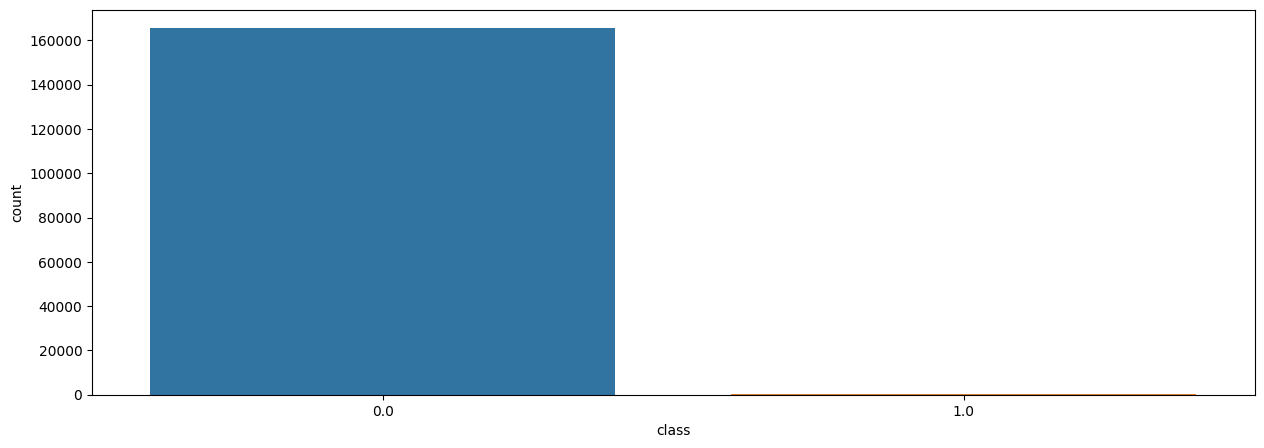

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud,x='class')

In [62]:
fraud['class'].value_counts().to_frame()

,class
0.0,165542
1.0,340


In [63]:
from sklearn.utils import resample

In [64]:
  fraud_majority=fraud[fraud['class']==0]
fraud_minority=fraud[fraud['class']==1]

In [65]:
fraud_majority_downsample=resample(fraud_majority,n_samples=473,replace=False,random_state=42)

In [66]:
fraud_df=pd.concat([fraud_majority_downsample,fraud_minority])

In [69]:
fraud_df['class'].value_counts().to_frame()

,class
0.0,473
1.0,340


<Axes: xlabel='class', ylabel='count'>

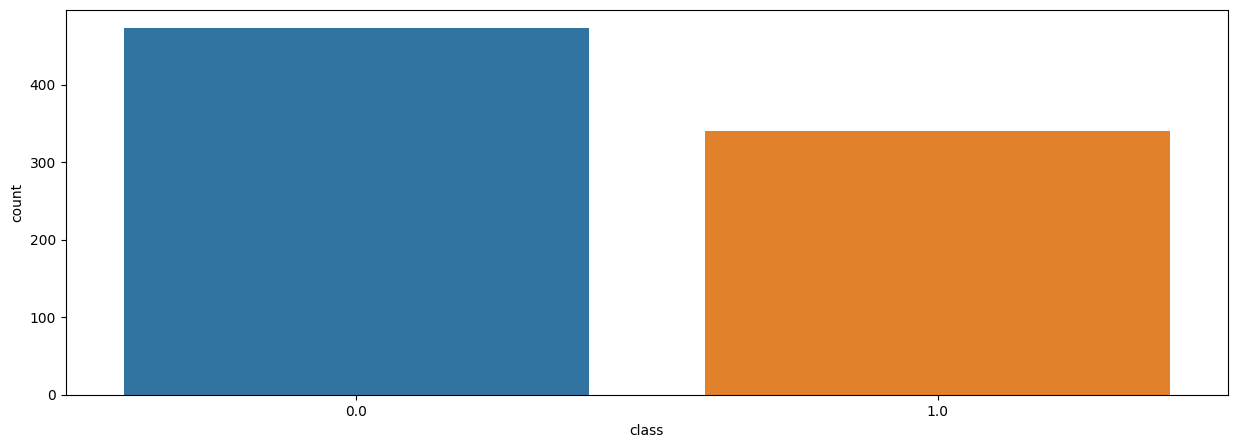

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud_df,x='class')

In [71]:
fraud_df.corr()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000000,0.087110,-0.058312,0.068460,-0.101445,0.082359,0.133878,0.017173,-0.232519,0.036771,...,-0.095308,0.152333,0.078118,0.040875,-0.165502,-0.097100,-0.224079,-0.026724,-0.033844,-0.062243
v1,0.087110,1.000000,-0.841917,0.900353,-0.666456,0.886190,0.414540,0.890810,-0.230749,0.685934,...,0.115136,-0.116426,0.014476,-0.067804,-0.053023,0.045553,0.094522,0.206278,-0.050017,-0.489889
v2,-0.058312,-0.841917,1.000000,-0.897999,0.727068,-0.835494,-0.388191,-0.861531,0.140812,-0.718005,...,-0.102122,0.127111,0.124653,0.002812,0.094258,-0.026347,-0.113286,0.074930,-0.152361,0.556794
v3,0.068460,0.900353,-0.897999,1.000000,-0.803985,0.879901,0.521672,0.909087,-0.293204,0.769034,...,0.076769,-0.101481,-0.006492,0.011745,-0.074929,-0.016007,0.008677,0.113079,-0.017121,-0.616978
v4,-0.101445,-0.666456,0.727068,-0.803985,1.000000,-0.634304,-0.459285,-0.767209,0.147447,-0.795426,...,-0.047031,0.190615,0.009761,-0.044922,-0.088726,0.146100,0.048599,-0.133214,0.036606,0.733344
v5,0.082359,0.886190,-0.835494,0.879901,-0.634304,1.000000,0.387437,0.866672,-0.315227,0.687962,...,0.083627,-0.138839,-0.086939,-0.128208,-0.082621,0.056078,0.118966,0.113510,-0.118829,-0.463501
v6,0.133878,0.414540,-0.388191,0.521672,-0.459285,0.387437,1.000000,0.360413,-0.581097,0.385033,...,-0.203450,0.178052,0.289281,-0.060230,-0.131226,-0.034818,-0.273207,-0.032311,0.160764,-0.442299
v7,0.017173,0.890810,-0.861531,0.909087,-0.767209,0.866672,0.360413,1.000000,-0.042757,0.800593,...,0.207295,-0.276541,-0.030995,-0.041556,0.085064,0.006109,0.177267,0.158593,0.069478,-0.539253
v8,-0.232519,-0.230749,0.140812,-0.293204,0.147447,-0.315227,-0.581097,-0.042757,1.000000,-0.090601,...,0.372225,-0.366433,-0.329560,0.046867,0.331383,0.030982,0.417353,0.091642,0.022641,0.153591
v9,0.036771,0.685934,-0.718005,0.769034,-0.795426,0.687962,0.385033,0.800593,-0.090601,1.000000,...,0.182027,-0.289307,-0.065628,-0.002860,0.042247,-0.085491,0.097437,0.131719,-0.008686,-0.587894


In [72]:
df_corr_class=fraud_df.corr()['class'].to_frame()

<Axes: xlabel='class'>

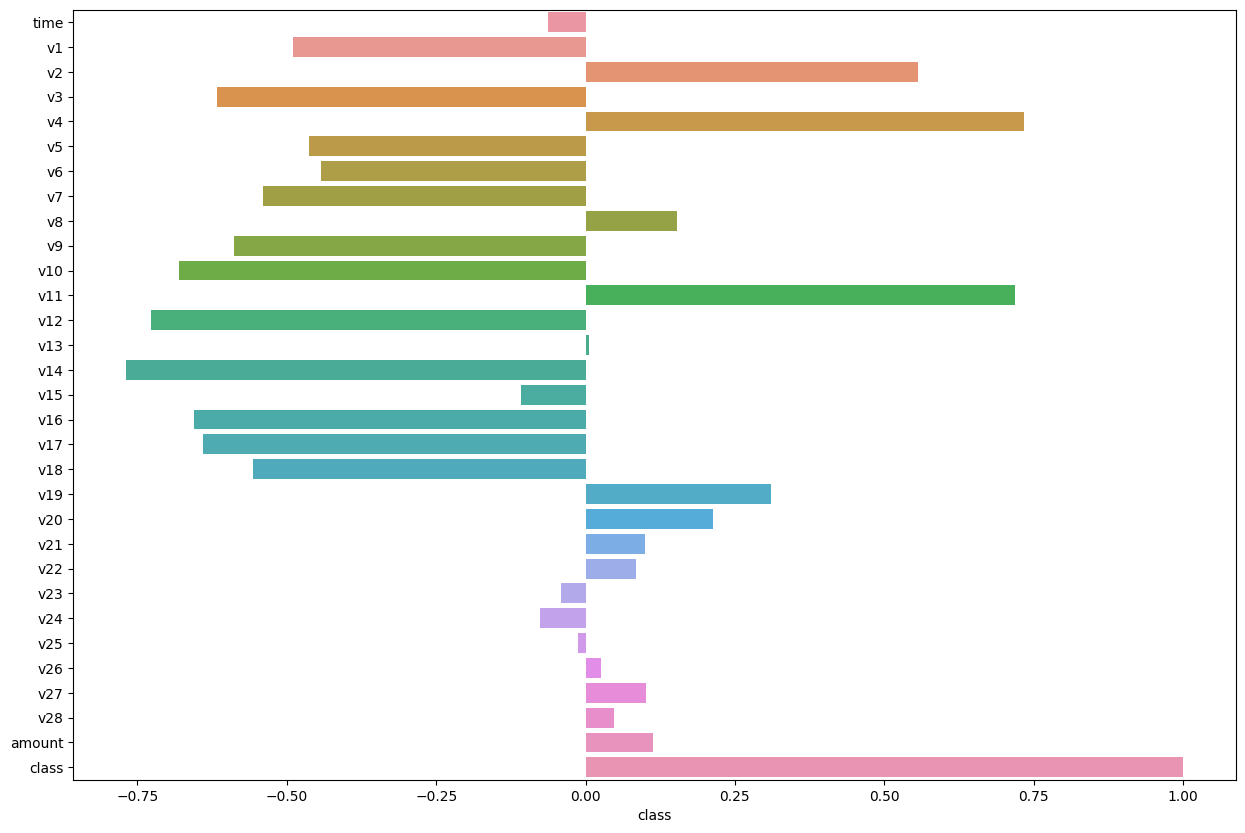

In [73]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_corr_class,y=df_corr_class.index,x='class')

In [74]:
x=fraud_df.drop(['class'],axis=1)
y=fraud_df['class']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((569, 30), (244, 30), (569,), (244,))

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression(max_iter=500)

In [80]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [81]:
lr.score(x_train,y_train)

0.9437609841827768

In [82]:
lr.score(x_test,y_test)

0.9508196721311475

In [83]:
y_pred=lr.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [85]:
precision_score(y_test,y_pred)

0.9393939393939394

In [86]:
recall_score(y_test,y_pred)

0.9393939393939394

In [87]:
accuracy_score(y_test,y_pred)

0.9508196721311475

In [88]:
f1_score(y_test,y_pred)

0.9393939393939394

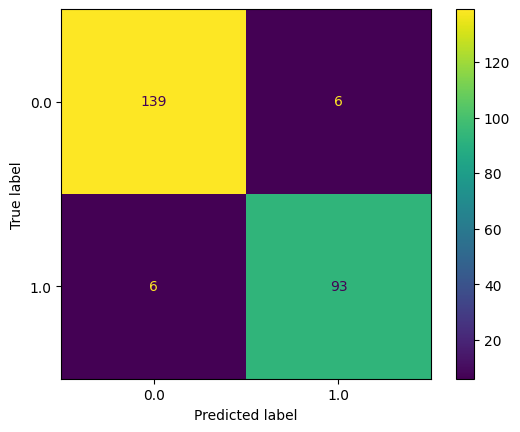

In [89]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()